<h1>1. Introduction</h1>
<br>
Jaipur is the capital and the largest city of the Indian state of Rajasthan. As of 2011, the city had a population of 3.1 million, making it the tenth most populous city in the country. Jaipur is also known as the Pink City, due to the dominant color scheme of its buildings. It is located 268 km (167 miles) from the national capital New Delhi.
Jaipur is a popular tourist destination in India and forms a part of the west Golden Triangle tourist circuit along with Delhi and Agra. It also serves as a gateway to other tourist destinations in Rajasthan such as Jodhpur, Jaisalmer, Udaipur, Kota, and Mount Abu. Jaipur is located 616 km from Shimla.
Personally, I have been brought up in Jaipur and have loved the city from the bottom of my heart. It is one of the major hubs of the world and is extremely diverse with people from various ethnicities residing here. The multi-cultural nature of the city of Jaipur has brought along with it numerous cuisines from all over the world. The people of India generally love food and I personally love to try different cuisines and experience different flavors. Thus, the aim of this project is to study the neighborhoods in Jaipur to determine possible locations for opening a restaurant. This project can be useful for business owners and entrepreneurs who are looking to invest in a restaurant in Jaipur. The main objective of this project is to carefully analyze appropriate data and find recommendations for the stakeholders.


<h1>2. Data Collection</h1>
The data required for this project is collected from various resources. The data and their source is described below.
   <h3>2.1 Neighborhoods Data:</h3>
   <p>The neighborhood or location data is scrapped from website https://www.zricks.com/Locality/Jaipur and parsed using     htmlparser using BeautifulSoup. The neighborhood column of the pandas dataframe is created by this location data.</p>

   <h3>2.2 Geographical Coordinates:</h3>
   <p>The geographical coordinates of the neighborhoods are obtained from GeoPy library in Python. The address or location is provided  in the geocode function in the library and it returns the latitude and longitude of the provided address. We pass the locations that we scrapped from https://www.zricks.com/Locality/Jaipur website and we get latitude and longitude for every address. If any location in geopy library returns none value that we return ‘Nan’ for it. This data is relevant for plotting the map of Jaipur using the Folium library in python. </p>

   <h3>2.3 Venues Data:</h3>
   <p>The venue data has been extracted using the Foursquare API. This data contains venue recommendations for all neighborhoods in Jaipur and is used to study the popular venues of different neighborhoods.</p>


<h3>Importing required libraries</h3>

In [26]:
import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score

<h3>Scrapping the website for obtaining locations in Jaipur</h3>

In [68]:
url = 'https://www.zricks.com/Locality/Jaipur'
result = requests.get(url).text
soup = BeautifulSoup(result,'html')
lis = soup.table.find_all('a')
location = []
#Collecting all the names of location.
for i in lis:
    location.append(i.text)
print(location)

['22 Godam', 'Achrol', 'Adarsh Nagar', 'Ajairajpura', 'Ajmeri Gate', 'Ambabari', 'Amer', 'Amrapali Circle', 'Anand Lok', 'Anand Nagar', 'Anand Puri', 'Anita Colony', 'Arjun Nagar', 'Asalpur', 'Ashok Nagar', 'Badanpura', 'Badi Chaupar', 'Bagrana', 'Bagru', 'Bais Godam', 'Bajaj Nagar', 'Bajaj Nagar Enclave', 'Balawala', 'Bani Park', 'Bapu Bazaar', 'Bapu Nagar', 'Barkat Nagar', 'Baroni', 'Bassi', 'Bhan Nagar', 'Bhankrota', 'Bhojpura', 'Bichun', 'Bindayaka', 'Biseswarji', 'Boraj', 'Boytawala', 'Brahmpuri', 'Brijlalpura', 'Budhsinghpura', 'C Scheme', 'Chaksu', 'Chandpol', 'Chandwaji', 'Chirnotiya', 'Chitrakoot', 'Chittora', 'Chokhi Dhani', 'Chomu', 'Civil Lines', 'Dantri', 'Dausa', 'Dayarampura', 'Dev Nagar', 'Dholai', 'Doctors Colony', 'Doongri', 'Dudu', 'Durgapura', 'Gandhi Nagar', 'Gangori Bazar', 'Gayatri Nagar', 'Ghat Darwaza', 'Ghati Karolan', 'Girdharipura', 'Gokulpura', 'Gopalbari', 'Gopalpura', 'Govind Nagar', 'Govindpura', 'Govindpuri', 'Greater Vidhyadhar Nagar', 'Hanuman Nagar',

In [4]:
#Function that take a address and return its coordinates values.
def get_lat_lng(address):
        geolocator = Nominatim(user_agent='foursquare_api')
        location = geolocator.geocode(address)
        if location == None:
            latitude = 'Nan'
            longitude = 'Nan'
        else:
            latitude = location.latitude
            longitude = location.longitude
        return(latitude,longitude)

In [5]:
#Obtaining coordinates of Jaipur
jaipur_lat, jaipur_lng = get_lat_lng('Jaipur, Rajasthan, India')
jaipur_lat, jaipur_lng 

(26.9154576, 75.8189817)

In [71]:
#Obtaining latitude and longitude of each locaation in Jaipur.
coordinates = []
for i in range(len(location)):
    coordinates.append(get_lat_lng(location[i]+', Jaipur, Rajasthan, India'))
print('all done')

all done


In [75]:
#Creating two separate lists for latitude and longitude values
latitudes = []
longitudes = []
for i in coordinates:
    latitudes.append(i[0])
    longitudes.append(i[1])
print(latitudes)
print(longitudes)

[26.902774, 27.1332143, 26.8986698, 'Nan', 26.91722115, 26.9446462, 26.9888269, 26.9115079, 'Nan', 26.9154576, 26.9009461, 26.9408388, 26.8726764, 26.9192575, 26.897403699999998, 27.1188824, 26.9225798, 'Nan', 26.8087953, 26.8980237, 26.8988742, 'Nan', 26.7507457, 26.9316554, 26.9163598, 26.8850735, 26.8769857, 'Nan', 26.8349177, 26.9032206, 26.5743653, 26.654382, 'Nan', 26.923616, 'Nan', 26.8666879, 'Nan', 26.9344998, 26.89115065, 'Nan', 26.9270858, 26.6059831, 26.9259084, 27.2223111, 27.0101391, 26.9014106, 26.6371786, 26.7675872, 27.1725, 26.9096783, 26.6307722, 26.9078474, 26.8652331, 'Nan', 'Nan', 26.8966251, 27.0231572, 26.6811224, 26.855093, 26.9044357, 'Nan', 26.9051346, 26.9134878, 26.8503709, 26.7941565, 26.5026077, 'Nan', 26.571525, 26.9366541, 26.8451133, 26.8939659, 'Nan', 26.918717, 27.8027344, 26.9142683, 26.9918233, 'Nan', 'Nan', 27.14071, 27.2872533, 27.0725203, 26.9641528, 'Nan', 'Nan', 27.0228991, 26.9038173, 26.9025479, 'Nan', 26.8397772, 26.8930427, 26.8413704, 26.

In [76]:
#Combining the locations with their respective latutude and longitude.
data = list(zip(location,latitudes,longitudes))

In [ ]:
#Creating a pandas data frame hving neighborhood , latitude and longitude columns. 
columns_names = ['neighborhood','latitude','longitude']
locations_df = pd.DataFrame(data,columns=columns_names)

In [99]:
#Creating a csv file of scrapped data so we can use it later rather than always scapping the website and obtaining the 
#latitude and longitide all the time
locations_df.to_csv('neighbourhood_data')

In [29]:
#read csv file of structured data for Jaipur Neighborhoods.
locations_df = pd.read_csv('neighbourhood_data')
locations_df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [30]:
locations_df.head(10)

,neighborhood,latitude,longitude
0,22 Godam,26.902774,75.7927199
1,Achrol,27.1332143,75.9566333
2,Adarsh Nagar,26.8986698,75.8163567
3,Ajairajpura,Nan,Nan
4,Ajmeri Gate,26.91722115,75.81681843102842
5,Ambabari,26.9446462,75.7783245
6,Amer,26.9888269,75.8558916
7,Amrapali Circle,26.9115079,75.7438297
8,Anand Lok,Nan,Nan
9,Anand Nagar,26.9154576,75.8189817


In [31]:
#Dimensions of dataframe
locations_df.shape

(210, 3)

In [32]:
# Removal of Nan values present in dataframe.
location_df = locations_df[(locations_df['latitude']!='Nan')| (locations_df['longitude']!= 'Nan')]
location_df = location_df.reset_index().drop(['index'],axis=1)

In [33]:
location_df.head(10)

,neighborhood,latitude,longitude
0,22 Godam,26.902774,75.7927199
1,Achrol,27.1332143,75.9566333
2,Adarsh Nagar,26.8986698,75.8163567
3,Ajmeri Gate,26.91722115,75.81681843102842
4,Ambabari,26.9446462,75.7783245
5,Amer,26.9888269,75.8558916
6,Amrapali Circle,26.9115079,75.7438297
7,Anand Nagar,26.9154576,75.8189817
8,Anand Puri,26.9009461,75.8234935
9,Anita Colony,26.9408388,75.7781246


In [34]:
# Checking data types of each column.
location_df.dtypes

neighborhood    object
latitude        object
longitude       object
dtype: object

In [35]:
#Converting data type of latitude and longitude column into float type
location_df[['latitude','longitude']] = location_df[['latitude','longitude']].astype(float)

In [36]:
# Checking data types for each column.
location_df.dtypes

neighborhood     object
latitude        float64
longitude       float64
dtype: object

In [39]:
# Creating a map using Folium library and plotting all the location points on it.
map = folium.Map([jaipur_lat, jaipur_lng],zoom_start=10)
for point in range(len(location_df)):
    folium.Marker([location_df['latitude'][point],location_df['longitude'][point]],popup=location_df['neighborhood'][point]).add_to(map)
map

In [40]:
# Retrieving the data for Sanganer location.
location_df[location_df['neighborhood'] == 'Sanganer']

,neighborhood,latitude,longitude
134,Sanganer,26.814622,75.773187


In [41]:
name = location_df['neighborhood'][134]
sanganer_lat, sanganer_lng = get_lat_lng(name+', Jaipur, Rajasthan')
print('The neighborhood is {} and its latitude and longitude is: {} and {}'.format(name,sanganer_lat,sanganer_lng))

The neighborhood is Sanganer and its latitude and longitude is: 26.8146217 and 75.7731874


In [42]:
# Using of Foursquare API.
LIMIT = 100
radius = 1000
CLIENT_ID = 'YAGC11DLKOVZK4HIVHYJRBESZ12431LVRN3JCEJFYLTRT4NO'
CLIENT_SECRET = 'PE3MQKG1IFZYV0OZNP1BU1DFIXRV2FDPVEY5M5HCESVQH4B5'
VERSION = '20180605'
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        sanganer_lat,
        sanganer_lng,
        radius,
        LIMIT)

In [43]:
# Exploring the venues that are in 1000 m radius in Sanganer.
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60ab58d777956e2e222fcf38'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 3,
  'suggestedBounds': {'ne': {'lat': 26.823621709000008,
    'lng': 75.78325294577401},
   'sw': {'lat': 26.805621690999992, 'lng': 75.76312185422599}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '507f313ae4b01de01862b854',
       'name': 'Sanganer Railway Station',
       'location': {'lat': 26.814610904314616,
        'lng': 75.7731771469116,
        'labeledLatLngs': [{'label': 'display',
          'lat': 2

In [44]:
# Function that returns the category type of each venue.
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [45]:
# Obtaining venues , their categories and their latitude , longitude for sanganer neighborhood.
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name','venue.categories','venue.location.lat','venue.location.lng']
nearby_venues = nearby_venues.loc[:,filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues

<ipython-input-45-8332f075c2c1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


,name,categories,lat,lng
0,Sanganer Railway Station,Train Station,26.814611,75.773177
1,cake8door,Cupcake Shop,26.812618,75.777422
2,Siyaram Caters,Food Service,26.819781,75.771621


In [46]:
print("{} venues were returned for {} by Foursquare".format(len(nearby_venues), name))

3 venues were returned for Sanganer by Foursquare


In [47]:
# Function that returns all the venues within 500 m radius in all the neighborhood of data frame with their categories and 
#latitude and longitude.
def getNearByVenues(names, latitude, longitude, radius=500):
    venues_list = []
    for name, lat, lng in zip(names,latitude,longitude):
        print(name)
        
        url = url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT)
        
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results ])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [48]:
# Getting all the venues for each neighborhhd in dataframe.
jaipur_venues = getNearByVenues(names=location_df['neighborhood'], latitude=location_df['latitude'], longitude=location_df['longitude'], radius=radius)

22 Godam
Achrol
Adarsh Nagar
Ajmeri Gate
Ambabari
Amer
Amrapali Circle
Anand Nagar
Anand Puri
Anita Colony
Arjun Nagar
Asalpur
Ashok Nagar
Badanpura
Badi Chaupar
Bagru
Bais Godam
Bajaj Nagar
Balawala
Bani Park
Bapu Bazaar
Bapu Nagar
Barkat Nagar
Bassi
Bhan Nagar
Bhankrota
Bhojpura
Bindayaka
Boraj
Brahmpuri
Brijlalpura
C Scheme
Chaksu
Chandpol
Chandwaji
Chirnotiya
Chitrakoot
Chittora
Chokhi Dhani
Chomu
Civil Lines
Dantri
Dausa
Dayarampura
Doctors Colony
Doongri
Dudu
Durgapura
Gandhi Nagar
Gayatri Nagar
Ghat Darwaza
Ghati Karolan
Girdharipura
Gokulpura
Gopalpura
Govind Nagar
Govindpura
Govindpuri
Hanuman Nagar
Hasanpura
Hathroi
Heerawala
Israwala
Jagatpura
Jairampura
Jaisinghpura
Jamwa Ramgarh
Janata Colony
Janta Colony
Jawahar Circle
Jawahar Nagar
Jharna
Jhotwara
Jhotwara Industrial Area
Jobner
Johari Bazar
Jyoti Nagar
Kalwara
Kanak Vihar
Kanakpura
Kanota
Kanwar Nagar
Kapriyawas Kalan
Karni Vihar
Kartarpura
Khatipura
Kotputli
Kotra
Kukas
Lal Kothi
Lalarpura
Lalkothi
Mahapura
Mahaveer Na

In [49]:
# Visualising all the venues.
jaipur_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,22 Godam,26.902774,75.79272,Curious Life Coffee Roasters,26.904097,75.797121,Café
1,22 Godam,26.902774,75.79272,Mr. Beans,26.905093,75.793994,Café
2,22 Godam,26.902774,75.79272,OTH,26.905290,75.794555,Bakery
3,22 Godam,26.902774,75.79272,Hotel Rajmahal Palace,26.904432,75.792451,Hotel
4,22 Godam,26.902774,75.79272,Cafe Bae,26.899854,75.792848,Café
5,22 Godam,26.902774,75.79272,Pizza Hut,26.903458,75.792632,Pizza Place
6,22 Godam,26.902774,75.79272,Holiday Inn Jaipur City Centre,26.902940,75.792486,Hotel
7,22 Godam,26.902774,75.79272,Cafe Coffee Day,26.906074,75.797062,Café
8,22 Godam,26.902774,75.79272,100% Rock,26.906063,75.796969,Nightclub
9,22 Godam,26.902774,75.79272,MGF Metropolitan,26.902495,75.793731,Shopping Mall


In [50]:
# Getting count of venues returned by foursquare Api for each neighborhood.
jaipur_venues.groupby('Neighborhood',as_index=False).count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,22 Godam,27,27,27,27,27,27
1,Achrol,1,1,1,1,1,1
2,Adarsh Nagar,21,21,21,21,21,21
3,Ajmeri Gate,32,32,32,32,32,32
4,Ambabari,9,9,9,9,9,9
...,...,...,...,...,...,...,...
111,Transport Nagar,3,3,3,3,3,3
112,Udyog Nagar,4,4,4,4,4,4
113,Vaishali Nagar,9,9,9,9,9,9
114,Vidhyadhar Nagar,4,4,4,4,4,4


In [52]:
# Total unique venues.
print("There are {} unique categories".format(len(jaipur_venues['Venue Category'].unique())))

There are 109 unique categories


<h3>3.1 Feature Extraction:</h3>
<p>Feature extraction was carried out to obtain features from the Foursquare API data which was used for building the unsupervised learning model. In order to achieve this, the “Venue Category” Column had to be converted to some from of numeric value to be used for building the model. This was achieved by one-hot-encoding method which takes all the unique categories and creates a column for each category. Then, if a neighborhood venue belonged to that category, it would get a value of 1 for that row in that row in that specific category column and if a neighborhood venue does not belong to the particular category, the value would be 0. This process was repeated for all the venues in all neighborhoods and the result was a sparse matrix containing the neighborhood name and all unique category columns with either 1 or 0 based on whether the neighborhood venue belonged to that category or not.</p>


In [108]:
# Getting dummy columns for all the venues.
jaipur_onehot = pd.get_dummies(jaipur_venues[['Venue Category']], prefix="", prefix_sep="")
jaipur_onehot.head()

,ATM,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Auto Dealership,...,Tea Room,Temple,Train Station,Travel Agency,Turkish Restaurant,Vegetarian / Vegan Restaurant,Water Park,Well,Women's Store,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
jaipur_onehot['Neighborhood'] = jaipur_venues['Neighborhood']
jaipur_onehot.head()

,Neighborhood,ATM,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,...,Tea Room,Temple,Train Station,Travel Agency,Turkish Restaurant,Vegetarian / Vegan Restaurant,Water Park,Well,Women's Store,Zoo
0,22 Godam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22 Godam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22 Godam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22 Godam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22 Godam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
# Placing Neighborhood column at starting.
temp = list(jaipur_onehot.columns)

if 'Neighborhood' in temp:
    temp.remove('Neighborhood')
    
fixed_columns = ['Neighborhood'] + temp
jaipur_onehot = jaipur_onehot[fixed_columns]
jaipur_onehot.head()
print(len(jaipur_onehot['Neighborhood'].unique()))

115


In [100]:
jaipur_grouped = jaipur_onehot.groupby('Neighborhood',sort=False).mean()
print(jaipur_grouped.shape)
jaipur_grouped.head(10)

(115, 109)


,ATM,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Auto Dealership,...,Tea Room,Temple,Train Station,Travel Agency,Turkish Restaurant,Vegetarian / Vegan Restaurant,Water Park,Well,Women's Store,Zoo
Neighborhood,,,,,,,,,,,,,,,,,,,,,
22 Godam,0.000,0.0,0.034483,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Adarsh Nagar,0.000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.043478,0.0,0.0,0.0,0.043478,0.000000,0.043478,0.000000,0.043478,0.000000
Ajmeri Gate,0.000,0.0,0.000000,0.000000,0.0,0.064516,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258
Ambabari,0.000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Amer,0.000,0.0,0.000000,0.083333,0.0,0.083333,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000
Amrapali Circle,0.000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000
Anand Nagar,0.000,0.0,0.000000,0.000000,0.0,0.080000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000
Anand Puri,0.000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.058824,0.0,0.0,0.0,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000
Anita Colony,0.000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [61]:
# Priting top 5 venues for each neighborhood.
num_top_venues = 5

for hood in jaipur_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = jaipur_grouped[jaipur_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----22 Godam----
               venue  freq
0              Hotel  0.17
1               Café  0.17
2      Shopping Mall  0.10
3  Indian Restaurant  0.07
4       Dessert Shop  0.03


----Adarsh Nagar----
            venue  freq
0           Hotel  0.26
1            Café  0.09
2        Tea Room  0.04
3  Sandwich Place  0.04
4   Shopping Mall  0.04


----Ajmeri Gate----
                 venue  freq
0    Indian Restaurant  0.19
1                Hotel  0.10
2        Historic Site  0.06
3          Coffee Shop  0.06
4  Arts & Crafts Store  0.06


----Ambabari----
              venue  freq
0             Hotel  0.33
1  Department Store  0.11
2              Park  0.11
3       Coffee Shop  0.11
4    Clothing Store  0.11


----Amer----
               venue  freq
0      Historic Site  0.17
1             Palace  0.17
2               Café  0.08
3  Indian Restaurant  0.08
4        Art Gallery  0.08


----Amrapali Circle----
                           venue  freq
0                    Pizza Place  0.29
1 

                venue  freq
0               Hotel  0.29
1       Train Station  0.14
2              Bakery  0.14
3  Italian Restaurant  0.14
4       Jewelry Store  0.14


----Lalkothi----
            venue  freq
0            Café  0.12
1           Hotel  0.12
2    Dessert Shop  0.06
3  Clothing Store  0.06
4     Coffee Shop  0.06


----Mahapura----
                           venue  freq
0        North Indian Restaurant   1.0
1                            ATM   0.0
2                Motorcycle Shop   0.0
3                           Park   0.0
4  Paper / Office Supplies Store   0.0


----Mahaveer Nagar----
                           venue  freq
0                          Hotel  0.25
1               Department Store  0.12
2  Vegetarian / Vegan Restaurant  0.12
3                    Coffee Shop  0.12
4           Fast Food Restaurant  0.12


----Mahesh Nagar----
                 venue  freq
0                Hotel  0.38
1                  ATM  0.12
2  Arts & Crafts Store  0.12
3                 

4                ATM  0.00


----Tagore Nagar----
                            venue  freq
0              Athletics & Sports  0.25
1                       Multiplex  0.25
2  Multicuisine Indian Restaurant  0.25
3                  Breakfast Spot  0.25
4                             ATM  0.00


----Tilak Nagar----
                 venue  freq
0    Indian Restaurant  0.16
1                Hotel  0.08
2  Arts & Crafts Store  0.08
3               Market  0.08
4                 Café  0.08


----Tonk Phatak----
             venue  freq
0            Hotel  0.50
1    Jewelry Store  0.25
2    Train Station  0.25
3              ATM  0.00
4  Motorcycle Shop  0.00


----Transport Nagar----
                           venue  freq
0                  Shopping Mall   1.0
1                            ATM   0.0
2                Motorcycle Shop   0.0
3  Paper / Office Supplies Store   0.0
4                         Palace   0.0


----Udyog Nagar----
               venue  freq
0                ATM  0.50
1     

In [62]:
# Function that returns most common venues for each location.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [66]:
# Obtaining top 10 most common venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = jaipur_grouped['Neighborhood']

for ind in np.arange(jaipur_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(jaipur_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,22 Godam,Hotel,Café,Shopping Mall,Indian Restaurant,Fast Food Restaurant,Department Store,Dessert Shop,Pizza Place,Lounge,Resort
1,Adarsh Nagar,Hotel,Café,Shopping Mall,Women's Store,Department Store,Pizza Place,Park,Indian Sweet Shop,Indian Restaurant,Lounge
2,Ajmeri Gate,Indian Restaurant,Hotel,Historic Site,Arts & Crafts Store,Coffee Shop,Café,Market,Zoo,Juice Bar,Dessert Shop
3,Ambabari,Hotel,Shopping Mall,Multiplex,Department Store,Coffee Shop,Clothing Store,Park,Asian Restaurant,Dessert Shop,Diner
4,Amer,Palace,Historic Site,Bed & Breakfast,Arts & Crafts Store,Café,Restaurant,Hotel,Indian Restaurant,Art Gallery,Well
...,...,...,...,...,...,...,...,...,...,...,...
110,Transport Nagar,Shopping Mall,Zoo,Convenience Store,Department Store,Dessert Shop,Dhaba,Diner,Dog Run,Donut Shop,Electronics Store
111,Udyog Nagar,ATM,Indian Restaurant,Diner,Food Truck,Dessert Shop,Dhaba,Dog Run,Donut Shop,Electronics Store,Fabric Shop
112,Vaishali Nagar,Pizza Place,Coffee Shop,Multiplex,Athletics & Sports,BBQ Joint,Sandwich Place,Fast Food Restaurant,Food,Dessert Shop,Dhaba
113,Vidhyadhar Nagar,Hotel,Pizza Place,Arts & Crafts Store,Food Service,Department Store,Dessert Shop,Dhaba,Diner,Dog Run,Donut Shop


<h1>Model Tranning</h1>
<p>Now we can use KMeans clustering method to cluster the neighborhoods.
First we need to determine how many clusters to use. This will be done using the Silhouette Score.
We will define a function to plot the Silhouette Score that will be calculated using different number of clusters.<p>


In [67]:
# Function that plot a line plot for x and y.
def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('Checking Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [69]:
# Obtaing different accuracy score for different number of clusters.
maxk = 15
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = jaipur_grouped.drop('Neighborhood', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

[0.22767339993543642, 0.09877362057716567, 0.09607510683404834, 0.1235937080641728, 0.11713541223826168, 0.13777101821027748, 0.13411918167357934, 0.12983968161658924, 0.13488155316615436, 0.13679223020395886, 0.14184238118505652, 0.16669511177967988, 0.14726505661567768, 0.14118546010109212]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


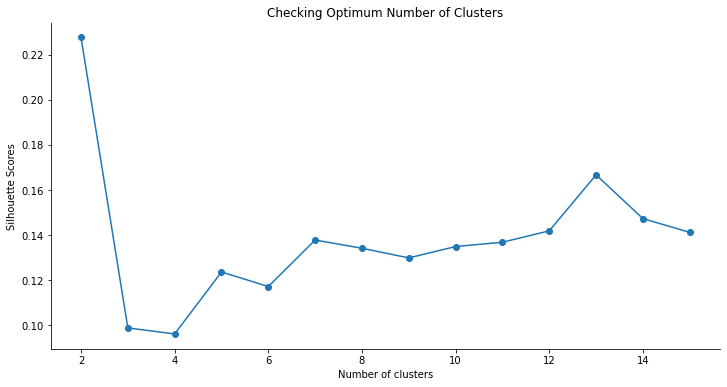

In [70]:
print(scores)
print(kval)
plot(kval, scores)

<p>We can see that the silhouette scores are not very high even as we increase the number of clusters. This means that the inter-cluster distance between different clusters is not very high over the range of k-values. However, we will try to cluster our data as best as we can. For this, we will use 2 clusters for our clustering model since it provides the highest silhouette score as seen above.</p>

In [92]:
# Trainning of model.
k = 2

jaipur_clustering = jaipur_grouped.drop('Neighborhood', axis=1)
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit(jaipur_clustering) #Can choose any random_state

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0])

In [148]:
location_df = location_df.set_index('neighborhood')
location_df = location_df.loc[neighborhoods_venues_sorted['Neighborhood']]
location_df.reset_index(inplace=True)
print(location_df.shape)
location_df.head()

(115, 3)


,neighborhood,latitude,longitude
0,22 Godam,26.902774,75.792720
1,Adarsh Nagar,26.898670,75.816357
2,Ajmeri Gate,26.917221,75.816818
3,Ambabari,26.944646,75.778324
4,Amer,26.988827,75.855892


In [149]:
# Merge the cluster levels with Jaipur most common 10 venues and Jaipur neighborhood data,
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
jaipur_merged = location_df
jaipur_merged = jaipur_merged.join(neighborhoods_venues_sorted)
jaipur_merged.tail()

,neighborhood,latitude,longitude,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
110,Transport Nagar,26.912600,75.840617,1,Transport Nagar,Shopping Mall,Zoo,Convenience Store,Department Store,Dessert Shop,Dhaba,Diner,Dog Run,Donut Shop,Electronics Store
111,Udyog Nagar,26.984567,75.772838,0,Udyog Nagar,ATM,Indian Restaurant,Diner,Food Truck,Dessert Shop,Dhaba,Dog Run,Donut Shop,Electronics Store,Fabric Shop
112,Vaishali Nagar,26.909570,75.739173,1,Vaishali Nagar,Pizza Place,Coffee Shop,Multiplex,Athletics & Sports,BBQ Joint,Sandwich Place,Fast Food Restaurant,Food,Dessert Shop,Dhaba
113,Vidhyadhar Nagar,26.971332,75.777526,1,Vidhyadhar Nagar,Hotel,Pizza Place,Arts & Crafts Store,Food Service,Department Store,Dessert Shop,Dhaba,Diner,Dog Run,Donut Shop
114,Vishwakarma Industrial Area,26.989445,75.780060,0,Vishwakarma Industrial Area,ATM,Indian Restaurant,Diner,Business Service,Food Service,Dessert Shop,Dhaba,Dog Run,Donut Shop,Electronics Store


In [152]:
# Printing the dataframe
print(jaipur_merged.shape)
jaipur_merged.head(10)


(115, 15)


,neighborhood,latitude,longitude,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,22 Godam,26.902774,75.792720,1,22 Godam,Hotel,Café,Shopping Mall,Indian Restaurant,Fast Food Restaurant,Department Store,Dessert Shop,Pizza Place,Lounge,Resort
1,Adarsh Nagar,26.898670,75.816357,1,Adarsh Nagar,Hotel,Café,Shopping Mall,Women's Store,Department Store,Pizza Place,Park,Indian Sweet Shop,Indian Restaurant,Lounge
2,Ajmeri Gate,26.917221,75.816818,1,Ajmeri Gate,Indian Restaurant,Hotel,Historic Site,Arts & Crafts Store,Coffee Shop,Café,Market,Zoo,Juice Bar,Dessert Shop
3,Ambabari,26.944646,75.778324,1,Ambabari,Hotel,Shopping Mall,Multiplex,Department Store,Coffee Shop,Clothing Store,Park,Asian Restaurant,Dessert Shop,Diner
4,Amer,26.988827,75.855892,1,Amer,Palace,Historic Site,Bed & Breakfast,Arts & Crafts Store,Café,Restaurant,Hotel,Indian Restaurant,Art Gallery,Well
5,Amrapali Circle,26.911508,75.743830,1,Amrapali Circle,Pizza Place,Coffee Shop,Vegetarian / Vegan Restaurant,BBQ Joint,Sandwich Place,Fast Food Restaurant,Food,Department Store,Dessert Shop,Dhaba
6,Anand Nagar,26.915458,75.818982,1,Anand Nagar,Indian Restaurant,Hotel,Arts & Crafts Store,Café,Market,Zoo,Fast Food Restaurant,Coffee Shop,Dessert Shop,Museum
7,Anand Puri,26.900946,75.823493,1,Anand Puri,Hotel,Café,Shopping Mall,Tea Room,Ice Cream Shop,Indian Restaurant,Sandwich Place,Bar,Clothing Store,Turkish Restaurant
8,Anita Colony,26.940839,75.778125,1,Anita Colony,Hotel,Shopping Mall,Multiplex,Department Store,Coffee Shop,Clothing Store,Park,Asian Restaurant,Dessert Shop,Diner
9,Arjun Nagar,26.872676,75.787769,1,Arjun Nagar,Clothing Store,ATM,Café,Fast Food Restaurant,Motorcycle Shop,Food Truck,Food,Dhaba,Diner,Dog Run


In [153]:
# Visualizing the clusters.
map_clusters = folium.Map(location=[jaipur_lat, jaipur_lng], zoom_start=10)

x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(jaipur_merged['latitude'], jaipur_merged['longitude'], jaipur_merged['neighborhood'], jaipur_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h4> Cluster 1</h4>

In [157]:
jaipur_merged.loc[jaipur_merged['Cluster Labels'] == 0, jaipur_merged.columns[[0] + list(range(5, jaipur_merged.shape[1]))]]

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Bagru,ATM,Food Service,Department Store,Dessert Shop,Dhaba,Diner,Dog Run,Donut Shop,Electronics Store,Fabric Shop
19,Bassi,ATM,Food Service,Department Store,Dessert Shop,Dhaba,Diner,Dog Run,Donut Shop,Electronics Store,Fabric Shop
25,Chaksu,ATM,Food Service,Department Store,Dessert Shop,Dhaba,Diner,Dog Run,Donut Shop,Electronics Store,Fabric Shop
28,Chitrakoot,ATM,Athletics & Sports,Lawyer,Vegetarian / Vegan Restaurant,BBQ Joint,Multicuisine Indian Restaurant,Business Service,Fast Food Restaurant,Farm,Fabric Shop
50,Jobner,ATM,Platform,Asian Restaurant,Food Service,Dessert Shop,Dhaba,Diner,Dog Run,Donut Shop,Electronics Store
57,Karni Vihar,ATM,Multicuisine Indian Restaurant,Athletics & Sports,Business Service,Health & Beauty Service,Lawyer,IT Services,Vegetarian / Vegan Restaurant,Train Station,Fast Food Restaurant
58,Kartarpura,ATM,Arts & Crafts Store,Café,Shopping Mall,Astrologer,Fried Chicken Joint,Historic Site,Food,Dhaba,Diner
59,Kotputli,ATM,Food Service,Department Store,Dessert Shop,Dhaba,Diner,Dog Run,Donut Shop,Electronics Store,Fabric Shop
75,Nehru Nagar,ATM,Business Service,Electronics Store,Food Service,Dessert Shop,Dhaba,Diner,Dog Run,Donut Shop,Fabric Shop
79,Niwaru,ATM,Clothing Store,Fast Food Restaurant,Food Service,Dessert Shop,Dhaba,Diner,Dog Run,Donut Shop,Electronics Store


<h4> Cluster 2</h4>

In [158]:
jaipur_merged.loc[jaipur_merged['Cluster Labels'] == 1, jaipur_merged.columns[[0] + list(range(5, jaipur_merged.shape[1]))]]

,neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,22 Godam,Hotel,Café,Shopping Mall,Indian Restaurant,Fast Food Restaurant,Department Store,Dessert Shop,Pizza Place,Lounge,Resort
1,Adarsh Nagar,Hotel,Café,Shopping Mall,Women's Store,Department Store,Pizza Place,Park,Indian Sweet Shop,Indian Restaurant,Lounge
2,Ajmeri Gate,Indian Restaurant,Hotel,Historic Site,Arts & Crafts Store,Coffee Shop,Café,Market,Zoo,Juice Bar,Dessert Shop
3,Ambabari,Hotel,Shopping Mall,Multiplex,Department Store,Coffee Shop,Clothing Store,Park,Asian Restaurant,Dessert Shop,Diner
4,Amer,Palace,Historic Site,Bed & Breakfast,Arts & Crafts Store,Café,Restaurant,Hotel,Indian Restaurant,Art Gallery,Well
...,...,...,...,...,...,...,...,...,...,...,...
108,Tilak Nagar,Indian Restaurant,Hotel,Arts & Crafts Store,Café,Market,Zoo,Fast Food Restaurant,Coffee Shop,Dessert Shop,Museum
109,Tonk Phatak,Hotel,Train Station,Jewelry Store,Food Service,Department Store,Dessert Shop,Dhaba,Diner,Dog Run,Donut Shop
110,Transport Nagar,Shopping Mall,Zoo,Convenience Store,Department Store,Dessert Shop,Dhaba,Diner,Dog Run,Donut Shop,Electronics Store
112,Vaishali Nagar,Pizza Place,Coffee Shop,Multiplex,Athletics & Sports,BBQ Joint,Sandwich Place,Fast Food Restaurant,Food,Dessert Shop,Dhaba


<h1>Discussion</h1>
<p>By analyzing the two clusters obtained we can see that one of the clusters are more suited for restaurants and hotels, whereas, other cluster is less suited. Neighborhoods in clusters 1, contain a small percentage of restaurants, hotels, cafe and pubs in their top 10 common venues. These clusters contain a higher degree of other venues like train station, bus station, fish market, gym, performing arts venue and smoke shop, to name a few. Thus, they are not well suited for opening a new restaurant. On the other hand, neighborhoods in clusters 2 contain a much higher degree of restaurants, hotels, multiplex, cafes, bars and other food joints. Thus, the neighborhoods in this cluster would be well suited for opening a new restaurant. </p>


In [164]:
# Locations that are suitalble for opening a restaurant.
new_restaurant_neighborhoods = jaipur_merged.loc[jaipur_merged['Cluster Labels'] == 1, jaipur_merged.columns[[0, 1, 2] + list(range(5, jaipur_merged.shape[1]))]]
new_restaurant_neighborhoods.head()

,neighborhood,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,22 Godam,26.902774,75.792720,Hotel,Café,Shopping Mall,Indian Restaurant,Fast Food Restaurant,Department Store,Dessert Shop,Pizza Place,Lounge,Resort
1,Adarsh Nagar,26.898670,75.816357,Hotel,Café,Shopping Mall,Women's Store,Department Store,Pizza Place,Park,Indian Sweet Shop,Indian Restaurant,Lounge
2,Ajmeri Gate,26.917221,75.816818,Indian Restaurant,Hotel,Historic Site,Arts & Crafts Store,Coffee Shop,Café,Market,Zoo,Juice Bar,Dessert Shop
3,Ambabari,26.944646,75.778324,Hotel,Shopping Mall,Multiplex,Department Store,Coffee Shop,Clothing Store,Park,Asian Restaurant,Dessert Shop,Diner
4,Amer,26.988827,75.855892,Palace,Historic Site,Bed & Breakfast,Arts & Crafts Store,Café,Restaurant,Hotel,Indian Restaurant,Art Gallery,Well


<h1> Conclusion</h1>
<p>The neighborhoods in cluster having level 1 contain a variety of food joints like restaurants, tea rooms, bakery, cafe, steakhouse and pubs and also contain very diverse cuisines like Japanese, Indian, Chinese, Italian and seafood restaurants. So it is most suitable for opening a restaurant.</p>

In [168]:
# Map that showing loactions that are best suited for opening a restaurant.
map_res_locations = folium.Map(location=[jaipur_lat, jaipur_lng], zoom_start=10)

for lat, lng, neighborhood in zip(new_restaurant_neighborhoods['latitude'], new_restaurant_neighborhoods['longitude'],
                                             new_restaurant_neighborhoods['neighborhood']):
    label = neighborhood
    folium.Marker([lat, lng], popup='{} has geographical coordinates ({:.4f}, {:.4f})'.format(label, lat, lng),
                  icon=folium.Icon(color='lightred'), tooltip=label).add_to(map_res_locations)
    
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_res_locations) 

map_res_locations